# Project Name: Flight Fare Prediction
Dataset Link: https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

### Primary Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [51]:
# calling the train data
data=pd.read_csv('data_cleaned.csv')
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Sources_Chennai,Sources_Delhi,Sources_Kolkata,Sources_Mumbai,Destinations_Cochin,Destinations_Delhi,Destinations_Hyderabad,Destinations_Kolkata,Destinations_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### X and y

In [52]:
X=data.drop("Price",axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Sources_Chennai,Sources_Delhi,Sources_Kolkata,Sources_Mumbai,Destinations_Cochin,Destinations_Delhi,Destinations_Hyderabad,Destinations_Kolkata,Destinations_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
y=data["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Feature Selection

In [54]:
# lets see the importance of the columns with the help of the ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selector=ExtraTreesRegressor()
selector.fit(X,y)

# the following series represents the Importance of the corresponding feature

importance_of_feats=pd.Series(selector.feature_importances_,index=X.columns).sort_values(ascending=True)
importance_of_feats

Airline_Vistara Premium economy              0.000082
Airline_Trujet                               0.000097
Sources_Chennai                              0.000478
Destinations_Kolkata                         0.000579
Airline_Multiple carriers Premium economy    0.000884
Airline_GoAir                                0.001817
Airline_SpiceJet                             0.002917
Sources_Kolkata                              0.003276
Airline_Vistara                              0.005151
Destinations_Hyderabad                       0.006286
Sources_Mumbai                               0.006385
Sources_Delhi                                0.008340
Destinations_Cochin                          0.008998
Airline_Air India                            0.009466
Destinations_Delhi                           0.015607
Airline_IndiGo                               0.016924
Duration_minute                              0.017584
Airline_Multiple carriers                    0.018947
Arrival_minute              

Text(0, 0.5, 'features')

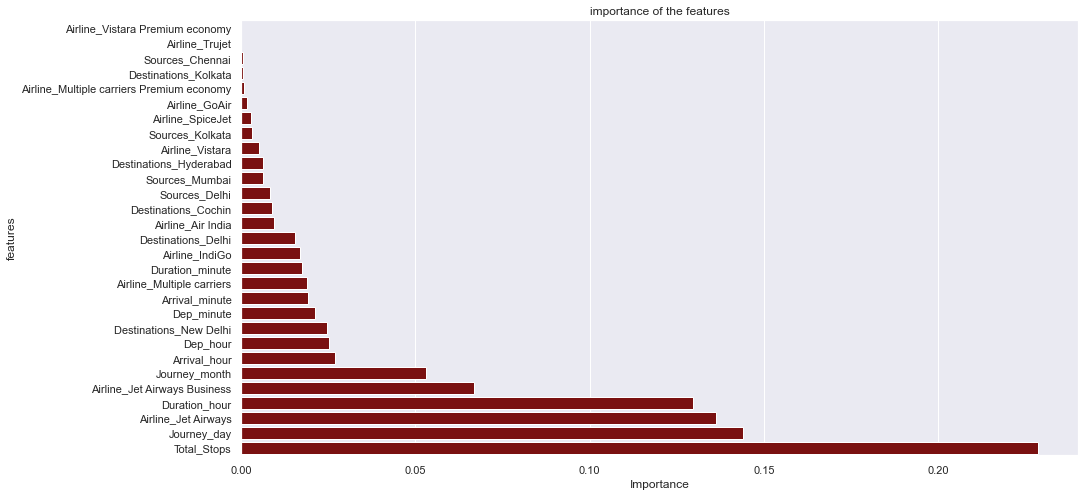

In [55]:
# to get a better visual understanding of the importance of the feature lets plot these in a barplot

sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(x=importance_of_feats,y=importance_of_feats.index,color="darkred")
plt.title("importance of the features")
plt.xlabel("Importance")
plt.ylabel("features")

# here we can see the most important feature is total_stop
# and for evry feature the importance is high for some categoris, therefore no feature can be removed
# we will be taking the features total stop, arrival time,departures time, journey date, source, destination as 
# our input variable for the model 

### Hyperparameter tuning

In [56]:
# Cross Validation Tools

from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

shuffle_cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=101)
grid={
    "n_estimators":np.arange(60,100,2),
    "criterion":["squared_error", "absolute_error", "poisson"],
    "max_features":["sqrt", "log2"],
    "min_samples_leaf":[5,10,15,20]
}

In [57]:
# building the model using the RandomForestRegressor

model=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=grid,n_iter=10)
model.fit(X,y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'n_estimators': array([60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92,
       94, 96, 98])})

In [58]:
#showing the model accuracy from cross validation and the chosen parameters

print(f"score: {round(100*model.best_score_,4)} %\nparameters: {model.best_params_}")

score: 71.2846 %
parameters: {'n_estimators': 88, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'absolute_error'}


### Final Model

In [60]:
# fitting the model using the optimized parameter

rf_model=RandomForestRegressor(**model.best_params_)
rf_model.fit(X,y)

RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      min_samples_leaf=5, n_estimators=88)

In [61]:
# predictec value

y_pred=rf_model.predict(X)

In [64]:
# the error

error=y-y_pred

Text(0.5, 0, 'Error')

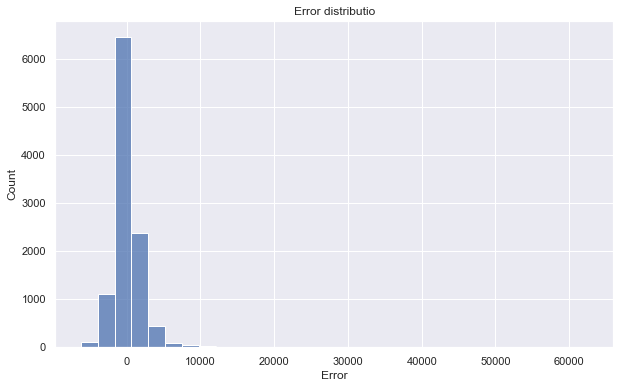

In [70]:
# plotting the error

sns.set(rc={"figure.figsize":(10,6)})
sns.histplot(error,bins=30)
plt.title("Error distributio")
plt.xlabel("Error")
plt.show()

# the errors are symmetrically clustered around 0

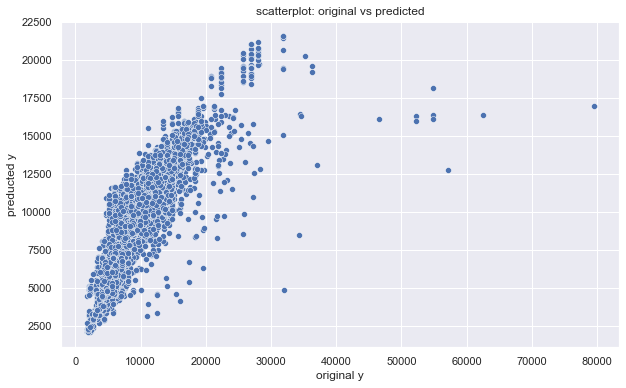

In [71]:
# y original vs y predicted plot

sns.scatterplot(x=y,y=y_pred)
plt.title("scatterplot: original vs predicted")
plt.xlabel("original y")
plt.ylabel("preducted y")
plt.show()

### Saving the model

In [72]:
import pickle
with open('model.pkl',"wb") as f:
    pickle.dump(rf_model,f)